# Numpy and Matplotlib #

These are two of the most fundamental parts of the scientific python "ecosystem". Most everything else is built on top of them. This is an introduction to python written by [Ryan Abernathy at Columbia University](https://ocean-transport.github.io/index.html) for his module on [Research Computing](https://rabernat.github.io/research_computing/).


In [1]:
import numpy as np

What did we just do? We _imported_ a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [2]:
# find out what is in our namespace
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'np',
 'quit']

In [3]:
# find out what's in numpy
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_arg',
 '_distributor_init',


In [4]:
# find out what version we have
np.__version__

'1.16.2'

The numpy documentation is crucial!

http://docs.scipy.org/doc/numpy/reference/

## NDArrays ##

The core class is the numpy ndarray (n-dimensional array).

In [5]:
from IPython.display import Image
Image(url='http://docs.scipy.org/doc/numpy/_images/threefundamental.png')

In [6]:
# create an array from a list
a = np.array([9,0,2,1,0])

In [7]:
# find out the datatype
a.dtype

dtype('int64')

In [8]:
# find out the shape
a.shape

(5,)

In [9]:
# what is the shape
type(a.shape)

tuple

In [10]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

In [11]:
# check dtype and shape
b.dtype, b.shape

(dtype('float64'), (2, 4))

__Important Concept__: The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called "c-style" indexing)

## More array creation ##

There are lots of ways to create arrays.

In [12]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

In [13]:
# create some ranges
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# arange is left inclusive, right exclusive
np.arange(2,4,0.25)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

In [15]:
# linearly spaced
np.linspace(2,4,20)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

In [16]:
# log spaced
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [17]:
# two dimensional grids
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

## Indexing ##

Basic indexing is similar to lists

In [18]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

(-6.283185307179586, 6.283185307179586, 5.775453161144872)

In [19]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((100,), (50,))

In [20]:
# get some ranges
xx[3:10,30:40].shape

(7, 10)

There are many advanced ways to index arrays. You can read about them in the manual. Here is one example.

In [21]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

(2500,)

In [22]:
# the array got flattened
xx.ravel().shape

(5000,)

## Array Operations ##

There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.

### Basic Math ##

In [23]:
f = np.sin(xx) * np.cos(0.5*yy)

At this point you might be getting curious what these arrays "look" like. So we need to introduce some visualization.

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline 
#This last line is important as otherwise the plots won't show in your notebook

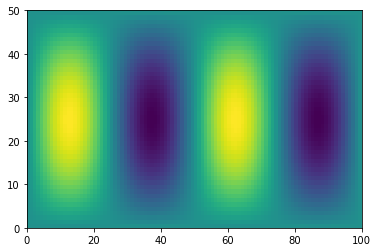

In [27]:
plt.pcolormesh(f)

## Manipulating array dimensions ##

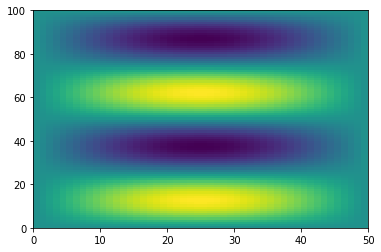

In [28]:
# transpose
plt.pcolormesh(f.T)

In [29]:
# reshape an array (wrong size)
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

5000


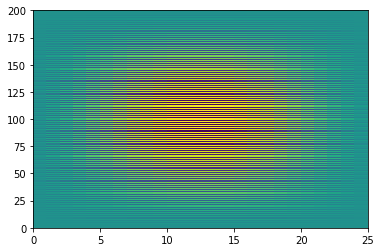

In [30]:
# reshape an array (right size) and mess it up
print(f.size)
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

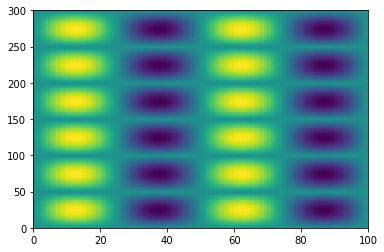

In [31]:
# tile an array
plt.pcolormesh(np.tile(f,(6,1)))

## Broadcasting ##

Broadcasting is an efficient way to multiply arrays of different sizes


In [32]:
Image(url='http://scipy-lectures.github.io/_images/numpy_broadcasting.png',
     width=720)

In [33]:
# multiply f by x
print(f.shape, x.shape)
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


In [34]:
# multiply f by y
print(f.shape, y.shape)
h = f * y
print(h.shape)

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

In [35]:
# use newaxis special syntax
h = f * y[:,np.newaxis]
print(h.shape)

(50, 100)


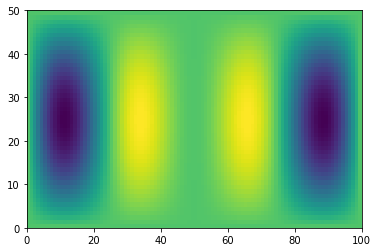

In [36]:
plt.pcolormesh(g)

## Reduction Operations ##

In [37]:
# sum
g.sum()

-3083.038387807155

In [38]:
# mean
g.mean()

-0.616607677561431

In [39]:
# std
g.std()

1.6402280119141424

In [40]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

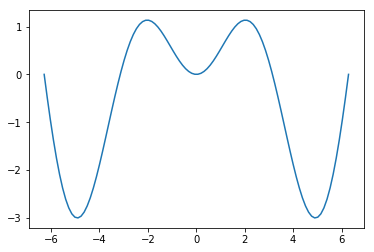

In [41]:
plt.plot(x, g_ymean)

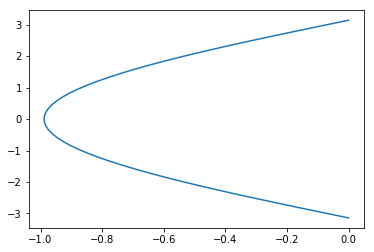

In [42]:
plt.plot(g_xmean, y)

## Fancy Plotting ##

Enough lessons, let's have some fun.

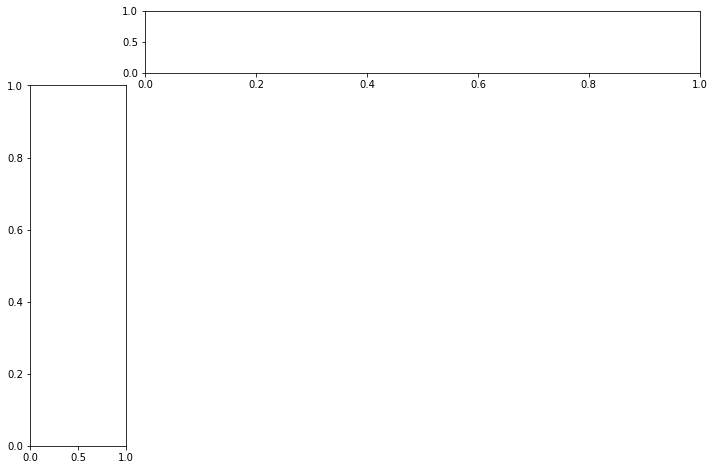

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((6,6),(0,1),colspan=5)
ax2 = plt.subplot2grid((6,6),(1,0),rowspan=5)


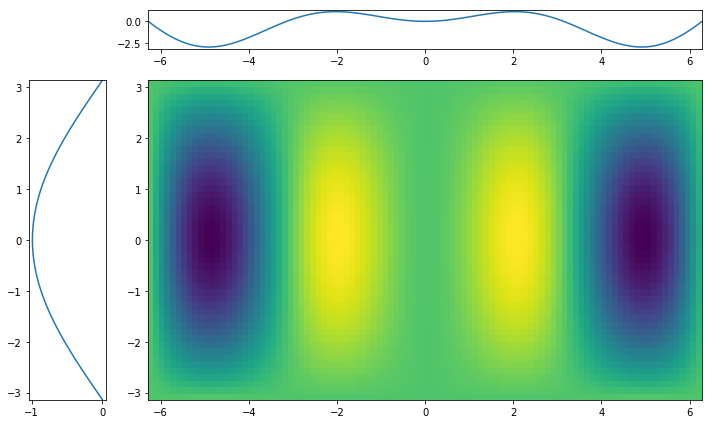

In [44]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot2grid((6,6),(0,1),colspan=5)
ax2 = plt.subplot2grid((6,6),(1,0),rowspan=5)
ax3 = plt.subplot2grid((6,6),(1,1),rowspan=5, colspan=5)

ax1.plot(x, g_ymean)
ax2.plot(g_xmean, y)
ax3.pcolormesh(x, y,  g)

ax1.set_xlim([x.min(), x.max()])
ax3.set_xlim([x.min(), x.max()])
ax2.set_ylim([y.min(), y.max()])
ax3.set_ylim([y.min(), y.max()])

plt.tight_layout()

## Real Data ##

ARGO float profile from North Atlantic

In [48]:
# download with curl
!curl -O https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

/usr/bin/sh: module: line 1: syntax error: unexpected end of file
/usr/bin/sh: error importing function definition for `BASH_FUNC_module'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k  100  140k    0     0   240k      0 --:--:-- --:--:-- --:--:--  240k


In [49]:
# load numpy file and examine keys
data = np.load('argo_float_4901412.npz')
data.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f4341ef7518>)

In [50]:
# access some data
T = data['T']

In [51]:
# there are "nans", missing data, which screw up our routines
T.min()

nan

In [52]:
ar_w_mask = np.ma.masked_array([1, 2, 3, 4, 5],
                        mask=[True, True, False, False, False])
ar_w_mask

masked_array(data=[--, --, 3, 4, 5],
             mask=[ True,  True, False, False, False],
       fill_value=999999)

In [53]:
ar_w_mask.mean()

4.0

In [54]:
T_ma = np.ma.masked_invalid(T)
T_ma.mean()

11.104955983298781

## Masked Arrays ##

This is how we deal with missing data in numpy

In [55]:
# create masked array
T = np.ma.masked_invalid(data['T'])
type(T)

numpy.ma.core.MaskedArray

In [56]:
# max and min
T.max(), T.min()

(24.364999771118164, 3.5320000648498535)

In [57]:
# load other data
S = np.ma.masked_invalid(data['S'])
P = np.ma.masked_invalid(data['P'])

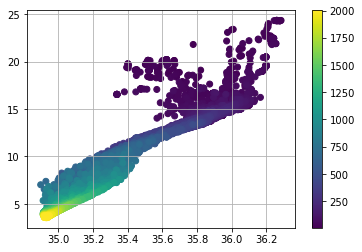

In [58]:
# scatter plot
plt.scatter(S, T, c=P)
plt.grid()
plt.colorbar()